# Download ADEX data using resource id and adex credentials

In [1]:
'''
COMMAND LINE TO DOWNLOAD DATA
(Replace <Resource Id>, <Client Id> and <Client Secret> with respective values)
To download csv files as parquet, install pyarrow and fastparquet
iudx --entity <Resource Id> --clientid=<Client Id> --secret=<Client Secret> --entity-type=resource --role=consumer --download=data --type=parquet --auth_url=https://ts.adex.org.in/auth/v1 --cat_url=https://ts.adex.org.in/adex/cat/v1 --rs_url=https://rs.ts.adex.org.in/ngsi-ld/v1
'''

'\nCOMMAND LINE TO DOWNLOAD DATA\n(Replace <Resource Id>, <Client Id> and <Client Secret> with respective values)\niudx --entity <Resource Id> --clientid=<Client Id> --secret=<Client Secret> --entity-type=resource --role=consumer --download=data --type=csv --auth_url=https://ts.adex.org.in/auth/v1 --cat_url=https://ts.adex.org.in/adex/cat/v1 --rs_url=https://rs.ts.adex.org.in/ngsi-ld/v1\n'

In [4]:
## install iudx python sdk
# ! pip install git+https://github.com/datakaveri/iudx-python-sdk

In [7]:
import ipywidgets as widgets
from IPython.display import display
import subprocess

# enter resource id to download
RESOURCE_ID = "21c72c11-13fd-44f5-b285-daf8e1d8eae8"

# Create widgets for client credentials
clientid_widget = widgets.Password(description='Client ID:', placeholder='ClientID')
clientsecret_widget = widgets.Password(description='Client Secret:', placeholder='ClientSecret')
OutputFile_widget = widgets.Text(description='Output:', placeholder='Output Zip File Name')  # Changed to Text widget for easier file name input

# Output widget to display messages
output = widgets.Output()

# Function to execute the command
def execute_command(b):
    with output:
        output.clear_output()  # Clear previous outputs
        client_id = clientid_widget.value
        client_secret = clientsecret_widget.value
        output_file_name = OutputFile_widget.value

        command = f"iudx --entity {RESOURCE_ID} --clientid={client_id} --secret={client_secret} --entity-type=resource --role=consumer --download={output_file_name} --type=parquet --auth_url=https://ts.adex.org.in/auth/v1 --cat_url=https://ts.adex.org.in/adex/cat/v1 --rs_url=https://rs.ts.adex.org.in/ngsi-ld/v1"
        
        # Print the command for debugging
        print(f"Executing: {command}")
        
        # Execute the command
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        # Check if the command was successful and print the appropriate message
        if process.returncode == 0:
            print("Downloaded the dataset")
        else:
            print("Failed to download the dataset")

# Create a button to trigger the command execution
execute_button = widgets.Button(description='Execute Command')
execute_button.on_click(execute_command)

# Display the widgets, button, and output area
display(clientid_widget)
display(clientsecret_widget)
display(OutputFile_widget)
display(execute_button)

'''
enter Client ID, CLient secret
copy resource ID from the catalogue
Output: Enter output file name without space. File will be downloaded in the working directory
'''


Password(description='Client ID:', placeholder='ClientID')

Password(description='Client Secret:', placeholder='ClientSecret')

Text(value='', description='Output:', placeholder='Output Zip File Name')

Button(description='Execute Command', style=ButtonStyle())

'\nenter Client ID, CLient secret\ncopy resource ID from the catalogue\nOutput: Enter output file name without space. File will be downloaded in the working directory\n'

## Explore the dataset

In [1]:
# Import the necessary libraries
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()

# Define the file name
# file_name = f"{OutputFile_widget.value}.parquet"
file_name = "LandPArcel.parquet"

# Construct the relative path to the file
relative_path = os.path.join(current_directory, file_name)

# Read the Parquet file using the correct function
LPH = pd.read_parquet(relative_path)

# List the columns in the file
print(LPH.columns)

# View the first 50 rows of the dataframe
print(LPH.head(5))


C:\LINDA_UGIX\ADEX use cases\python notebooks\LandPArcel.parquet
Index(['landExtentType', 'totalCount', 'id', 'districtName'], dtype='object')
  landExtentType  totalCount                                    id  \
0       marginal     38320.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
1          small     44643.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
2         medium      7611.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
3       marginal     75738.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
4     semimedium     19815.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   

  districtName  
0     ADILABAD  
1     ADILABAD  
2     ADILABAD  
3    BHADRADRI  
4    BHADRADRI  


## Remove the NULL or 0 values in the column 'totalCount'

In [2]:
# Remove null values using dropna() function
LPH_cleaned = LPH.dropna(subset=['totalCount'])

# Display the first 50 rows of the cleaned dataframe
print(LPH_cleaned.head(5))

# print(LPH_cleaned.describe())

  landExtentType  totalCount                                    id  \
0       marginal     38320.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
1          small     44643.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
2         medium      7611.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
3       marginal     75738.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   
4     semimedium     19815.0  21c72c11-13fd-44f5-b285-daf8e1d8eae8   

  districtName  
0     ADILABAD  
1     ADILABAD  
2     ADILABAD  
3    BHADRADRI  
4    BHADRADRI  


## Create a pivot table

In [3]:
#display column names
LPH_cleaned.columns

Index(['landExtentType', 'totalCount', 'id', 'districtName'], dtype='object')

In [4]:
# Create the pivot table
pivot_table = LPH_cleaned.pivot_table(
    values='totalCount', 
    index='districtName', 
    columns='landExtentType', 
    aggfunc='sum',  # Use 'sum' to aggregate values
    fill_value=0    # Fill NaN values with 0
)

# Display the pivot table
print(pivot_table)

# Save the pivot table as a csv file
pivot_table.to_csv('pivot_table_landHolding.csv')

landExtentType   large  marginal   medium  semimedium    small
districtName                                                  
ADILABAD         535.0   38320.0   7611.0     31113.0  44643.0
BHADRADRI        573.0   75738.0   4750.0     19815.0  32202.0
JAGTIAL          305.0  122152.0   4141.0     14069.0  33610.0
JANGAON          406.0   90994.0   5459.0     15975.0  35348.0
JAYASHANKAR      330.0  121526.0   3353.0     15624.0  38719.0
JOGULAMBA        620.0   76414.0   6026.0     20267.0  39038.0
KAMAREDDY        230.0  156771.0   3432.0     17783.0  55496.0
KARIMNAGAR       219.0  104917.0   3045.0     12359.0  34191.0
KHAMMAM          527.0  173692.0   8381.0     26821.0  58241.0
KOMARAM BHEEM    589.0   37374.0   6819.0     24321.0  28260.0
MAHABUBABAD      860.0   89181.0   4937.0     13562.0  31077.0
MAHABUBNAGAR    1263.0  180328.0  11618.0     38264.0  77611.0
MANCHERIAL       581.0   92733.0   4654.0     16756.0  30723.0
MEDAK            232.0  166161.0   2151.0     10549.0  

## Plot interactive pie chart
### (plot pie chart of land extent type by selecting the district)

In [5]:
'''
Dash library is used for building data visualization interfaces. 
'''
## Install dash library to 
# !pip install dash

'\nDash library is used for building data visualization interfaces. \n'

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
# import pandas as pd

# Calculate total counts
total_counts = pivot_table.sum().sum()
district_totals = pivot_table.sum(axis=1)

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Pie Chart of Land Holding Type in Each District"),
    html.Div([
        html.Label("Select district:", style={'margin-right': '10px'}),
        dcc.Dropdown(
            id='district-dropdown',
            options=[{'label': district, 'value': district} for district in pivot_table.index],
            value=pivot_table.index[0],  # Default value
            style={'width': '300px'}  # Increase the width of the dropdown
        )
    ], style={'display': 'flex', 'alignItems': 'center', 'marginBottom': '20px'}),
    html.Div([
        dcc.Graph(id='pie-chart'),
        html.Div(id='total-count', style={'margin-top': '30px', 'font-weight': 'bold'})
    ], style={'border': '2px solid black', 'padding': '20px'})
])

@app.callback(
    [Output('pie-chart', 'figure'),
     Output('total-count', 'children')],
    [Input('district-dropdown', 'value')]
)
def update_pie_chart(selected_district):
    filtered_data = pivot_table.loc[selected_district]
    fig = px.pie(
        values=filtered_data.values,
        names=filtered_data.index,
        
        title=f"<b>Land Holding Types in {selected_district}</b>",  # Bold title
        hole=0.2  # To create a donut chart
    )
  
    # Reduce the plot area by setting the margin
    fig.update_layout(margin=dict(l=20, r=20, t=25, b=20))
    fig.update_traces(textinfo='percent', marker=dict(colors=px.colors.qualitative.Pastel1))  # Use a different color palette and show only percentage values
        
    district_total = district_totals[selected_district]
    total_count_text = html.Div([
        html.P(f"Total count of all land holdings: {total_counts:.0f}"),
        html.P(f"Total count in {selected_district}: {district_total:.0f}")
    ])
    
    return fig, total_count_text

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


C:\Users\Linda\AppData\Local\Temp\ipykernel_9780\2641140057.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Linda\AppData\Local\Temp\ipykernel_9780\2641140057.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


## Plot as Heat map

In [9]:
import matplotlib.pyplot as plt

In [10]:
# ! pip install seaborn

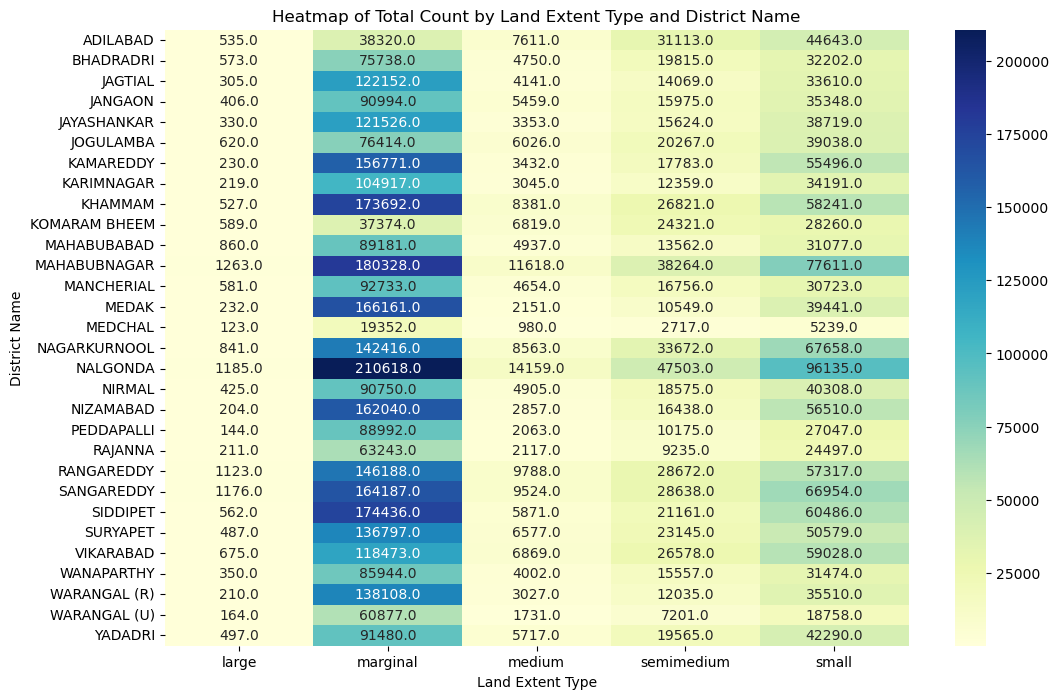

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the heatmap using the pivot table
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap of Total Count by Land Extent Type and District Name')
plt.xlabel('Land Extent Type')
plt.ylabel('District Name')

# Save the plot
plt.savefig('heatmap_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [12]:
# Identify districts with high count on each land category

In [13]:
'''
To define the range of count value as high medium and low, we fit the count to normal distribution 
and categorize the count value as high, medium and low value.
 > (μ+𝜎)        ====> High count range
 (μ-𝜎) to (μ+𝜎) ====> Medium count range
 < (μ-𝜎)        ====> Low count range
'''

'\nTo define the range of count value as high medium and low, we fit the count to normal distribution \nand categorize the count value as high, medium and low value.\n > (μ+𝜎)        ====> High count range\n (μ-𝜎) to (μ+𝜎) ====> Medium count range\n < (μ-𝜎)        ====> Low count range\n'

In [14]:
# compute mean and standard values using describe() fucntion
metadata = pivot_table.describe()
metadata

landExtentType,large,marginal,medium,semimedium,small
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,521.566667,114006.733333,5504.233333,19938.166667,43946.333333
std,330.298056,47845.617496,3093.521191,9681.243209,18827.542970
min,123.000000,19352.000000,980.000000,2717.000000,5239.000000
25%,230.500000,86706.000000,3122.000000,13688.750000,31656.000000
50%,492.000000,111695.000000,4921.000000,18179.000000,39239.500000
75%,612.250000,154125.250000,6856.500000,26013.750000,57115.250000
max,1263.000000,210618.000000,14159.000000,47503.000000,96135.000000


In [15]:
# Store means and standard deviations in variables
means = metadata.loc['mean']
stds = metadata.loc['std']

# Define classification function
def classify_values(value, mean, std):
    if value > (mean + std):
        return 'High count range'
    elif (mean - std) <= value <= (mean + std):
        return 'Medium count range'
    else:
        return 'Low count range'

# Apply classification to pivot table
classified_pivot_table = pivot_table.copy()

for column in classified_pivot_table.columns:
    mean = means[column]
    std = stds[column]
    classified_pivot_table[column] = classified_pivot_table[column].apply(classify_values, args=(mean, std))

print(classified_pivot_table)

landExtentType               large            marginal              medium  \
districtName                                                                 
ADILABAD        Medium count range     Low count range  Medium count range   
BHADRADRI       Medium count range  Medium count range  Medium count range   
JAGTIAL         Medium count range  Medium count range  Medium count range   
JANGAON         Medium count range  Medium count range  Medium count range   
JAYASHANKAR     Medium count range  Medium count range  Medium count range   
JOGULAMBA       Medium count range  Medium count range  Medium count range   
KAMAREDDY       Medium count range  Medium count range  Medium count range   
KARIMNAGAR      Medium count range  Medium count range  Medium count range   
KHAMMAM         Medium count range    High count range  Medium count range   
KOMARAM BHEEM   Medium count range     Low count range  Medium count range   
MAHABUBABAD       High count range  Medium count range  Medium c

### Identify districts with high count range in each land extent type

In [16]:
# Initialize a dictionary to store the results
high_count_districts = {}

# Iterate through each column (landExtentType) in the pivot table
for column in classified_pivot_table.columns:
    # Find the districts where the value is "High count range"
    high_count_districts[column] = classified_pivot_table[classified_pivot_table[column] == "High count range"].index.tolist()

# Print the result
print("Districts with 'High count range' for each landExtentType:")
for land_extent_type, districts in high_count_districts.items():
    print(f"{land_extent_type}: {districts}")


Districts with 'High count range' for each landExtentType:
large: ['MAHABUBABAD', 'MAHABUBNAGAR', 'NALGONDA', 'RANGAREDDY', 'SANGAREDDY']
marginal: ['KHAMMAM', 'MAHABUBNAGAR', 'MEDAK', 'NALGONDA', 'NIZAMABAD', 'SANGAREDDY', 'SIDDIPET']
medium: ['MAHABUBNAGAR', 'NALGONDA', 'RANGAREDDY', 'SANGAREDDY']
semimedium: ['ADILABAD', 'MAHABUBNAGAR', 'NAGARKURNOOL', 'NALGONDA']
small: ['MAHABUBNAGAR', 'NAGARKURNOOL', 'NALGONDA', 'SANGAREDDY']


## INFERENCE

**Challenges and Strategies for Agricultural Development in Telangana: An Analysis of Land Holdings**

Agriculture has long been the backbone of Telangana's economy. Its performance is crucial for inclusive growth. Telangana adopted the Green Revolution for rice cultivation in the 1970s, leading to significant changes in the structure and performance of its agrarian economy in recent years. Despite recognizing the importance of agriculture, the sector in Telangana faces numerous challenges, including small land holdings, low yields, high risks, lack of assured irrigation, growing indebtedness of farmer households, weak institutions, and poor infrastructure. By analyzing the extent of land holdings, policymakers can address these issues by tailoring agricultural practices to the specific types of land holdings. Farm land holdings are categorized based on size in agricultural censuses into five classes: marginal (below 1 hectare), small (1-2 hectares), semi-medium (2-4 hectares), medium (4-10 hectares), and large (10 hectares and above).

Understanding the types and distribution of agricultural land holdings is crucial for informed decision-making regarding resource allocation, rural development, and agricultural policies. This analysis helps identify the needs of different farmer groups, from smallholders to large-scale commercial farmers. Smallholders may need more support in subsidies, credit access, and technology transfer, while large farms might focus on export-oriented production and innovation. Additionally, analyzing land holdings aids in assessing the sustainability of agricultural practices and land use efficiency. Fragmented land holdings often lead to inefficient resource use and challenges in implementing modern farming techniques. Furthermore, understanding land tenure security is vital for encouraging farmers to invest in land improvements and enhance long-term agricultural productivity.

District-wise data on farmland holdings in Telangana was collected and analyzed. After data cleaning, the total count of all land holdings summed up to 5,517,511. A pivot table was generated, and a heat map was plotted, revealing that marginal and small land holdings had the highest counts. This indicates significant land fragmentation, complicating policy implementation. Districts with high counts in each land extent type were identified, aiding targeted policy implementation:

|Land holding type | District with higher count values                                         |
| :----------------| -------------------------------------------------------------------------:|
| Large            | MAHABUBABAD, MAHABUBNAGAR, NALGONDA, RANGAREDDY, SANGAREDDY               |
| Medium           | MAHABUBNAGAR, NALGONDA, RANGAREDDY, SANGAREDDY                            |
| Semi-medium      | ADILABAD, MAHABUBNAGAR, NAGARKURNOOL, NALGONDA                            |
| Marginal         | KHAMMAM, MAHABUBNAGAR, MEDAK, NALGONDA, NIZAMABAD, SANGAREDDY, SIDDIPET   |
| Small            | MAHABUBNAGAR, NAGARKURNOOL, NALGONDA, SANGAREDDY                          |

From this analysis, it is evident that Mahabubnagar and Nalgonda have high counts across all land types, making targeted agricultural practices more complex as policies must be tailored to each land type rather than the district as a whole. Conversely, districts like Sangareddy and Nagarkurnool, which have higher counts of small to semi-medium holdings (less than 4 hectares), allow for more straightforward district-wise policy implementation. By providing a clear picture of land ownership patterns, authorities can design targeted interventions to enhance food security, reduce poverty, and promote equitable land distribution. In essence, a thorough understanding of agricultural land holdings is indispensable for fostering a resilient, inclusive, and sustainable agricultural sector.